#作業：請依所提供的資料(2019STA.xlsx及2019STA2.xlsx)進行以下分析：
一、分析小考(Quiz)、期中考(Mid_Exam)、期末考(Final_Exam)成績之相關性。(請以視覺化圖形及檢定結果輔助說明之)

二、分析不同性別期末考成績及格比例之差異性。(請以圖表及檢定結果輔助說明之)

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager 

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-05-01 07:36:48--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.137.102, 74.125.137.138, 74.125.137.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k1nam2ijlp5n0jcg72q9d8oh7okp350u/1651390575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-05-01 07:36:48--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k1nam2ijlp5n0jcg72q9d8oh7okp350u/1651390575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.101.1

In [2]:
df1=pd.read_excel('2019STA.xlsx')
df2=pd.read_excel('2019STA_2.xlsx')
df3=df1.merge(df2,left_on = 'No',right_on='Number',how='outer')

In [3]:
#分類高於60為1其餘為0
# df3['Quiz_2']=df3['Quiz'].apply(lambda x:1 if x>=60 else 0)
# df3['Mid_Exam_2']=df3['Mid_Exam'].apply(lambda x:1 if x>=60 else 0)
df3['Final_Exam_2']=df3['Final_Exam'].apply(lambda x:1 if x>=60 else 0)
df3.head()

,No,Department,Grade,Gender,Quiz,Mid_Exam,Number,Final_Exam,Final_Exam_2
0,1,BA,一A,M,81,72.0,1,77,1
1,2,BA,一A,M,80,87.5,2,85,1
2,3,BA,一A,M,69,74.0,3,72,1
3,4,BA,一A,F,58,52.0,4,55,0
4,5,BA,一A,M,82,76.0,5,80,1


第一題

分析小考(Quiz)、期中考(Mid_Exam)、期末考(Final_Exam)成績之相關性。(請以視覺化圖形及檢定結果輔助說明之)

In [4]:
STA_set=['Quiz','Mid_Exam','Final_Exam']
from scipy import stats
name=[]
alist=[]
pvlist=[]
for i in range(len(STA_set)):
  (r,pvalue)=stats.pearsonr(df3['Quiz'],df3[STA_set[i]]) 
  name.append(STA_set[i])
  alist.append(r)
  pvlist.append(pvalue)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result=pd.DataFrame(alist,name,columns=['Correlation'])
result.insert(1,'p_value',pvlist) 
result

,Correlation,p_value
Quiz,1.000,0.000
Mid_Exam,0.921,0.000
Final_Exam,0.971,0.000


In [5]:
STA_set=['Quiz','Mid_Exam','Final_Exam']
from scipy import stats
name=[]
alist=[]
pvlist=[]
for i in range(len(STA_set)):
  (r,pvalue)=stats.pearsonr(df3['Mid_Exam'],df3[STA_set[i]]) 
  name.append(STA_set[i])
  alist.append(r)
  pvlist.append(pvalue)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result=pd.DataFrame(alist,name,columns=['Correlation'])
result.insert(1,'p_value',pvlist) 
result

,Correlation,p_value
Quiz,0.921,0.000
Mid_Exam,1.000,0.000
Final_Exam,0.977,0.000


In [6]:
STA_set=['Quiz','Mid_Exam','Final_Exam']
from scipy import stats
name=[]
alist=[]
pvlist=[]
for i in range(len(STA_set)):
  (r,pvalue)=stats.pearsonr(df3['Final_Exam'],df3[STA_set[i]]) 
  name.append(STA_set[i])
  alist.append(r)
  pvlist.append(pvalue)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result=pd.DataFrame(alist,name,columns=['Correlation'])
result.insert(1,'p_value',pvlist) 
result

,Correlation,p_value
Quiz,0.971,0.000
Mid_Exam,0.977,0.000
Final_Exam,1.000,0.000


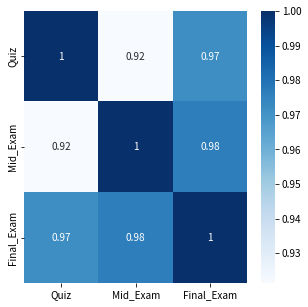

In [16]:
plt.rcParams['figure.figsize']=(5.0,5.0)
pairlist=['Quiz','Mid_Exam','Final_Exam']
sns.heatmap(df3[pairlist].corr(),annot=True,cmap='Blues')

第二題

分析不同性別期末考成績及格比例之差異性。(請以圖表及檢定結果輔助說明之)

In [8]:
gender_data=pd.crosstab(df3['Final_Exam_2'],df3['Gender'])
gender_data

Gender,F,M
Final_Exam_2,,
0,7,15
1,20,15


In [9]:
import scipy.stats as stats
Chi_Square=stats.chi2_contingency(gender_data)
print("Chi-Square value=%.3f,   p_value=%.3f"%Chi_Square[0:2])

Chi-Square value=2.534,   p_value=0.111


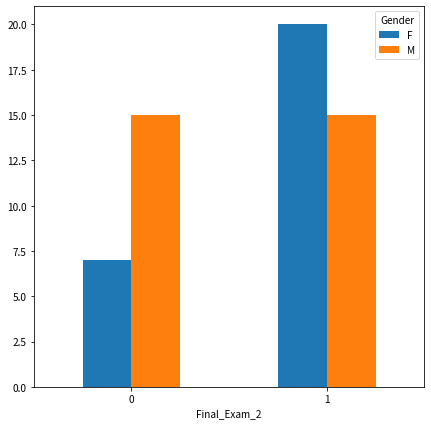

In [21]:
gender_data.plot.bar(rot=0)